# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_data = pd.read_csv('D:/Penyimpanan Uama/BANGKIT 2024/Submision Dicoding Analisis data/Bike-sharing-dataset/day.csv')

**Insight:**
- xxx
- xxx

### Assessing Data

In [3]:
print(day_data.info())
print(day_data.describe())
print(day_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

**Insight:**
- xxx
- xxx

### Cleaning Data

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
# Step 3: Data Wrangling (Merangkum data yang diperlukan)
# Membuat kolom baru untuk memahami lebih baik pengaruh cuaca dan waktu
day_data['year'] = day_data['yr'].apply(lambda x: '2011' if x == 0 else '2012')
day_data['month'] = pd.to_datetime(day_data['dteday']).dt.month_name()

# Pastikan kolom 'month' telah terbentuk
print(day_data[['dteday', 'month']].head())  # Tambahan untuk cek kolom 'month'

# Step 4: RFM Analysis
# Menambahkan kolom Total untuk menghitung jumlah penyewaan
day_data['Total'] = day_data['casual'] + day_data['registered']  # Menghitung total penyewaan
# Menghitung Recency
day_data['dteday'] = pd.to_datetime(day_data['dteday'])  # Pastikan dteday adalah datetime
recency = day_data['dteday'].max() - day_data['dteday']  # Menghitung recency
day_data['Recency'] = recency.dt.days  # Mengubah ke dalam bentuk hari

# Mengelompokkan berdasarkan recency, frequency, dan monetary
day_data['R'] = pd.qcut(day_data['Recency'], 4, labels=False)  # Recency
day_data['F'] = pd.qcut(day_data['Total'], 4, labels=False)     # Frequency
day_data['M'] = pd.qcut(day_data['Total'], 4, labels=False)     # Monetary

# Menyimpan RFM ke dalam DataFrame baru
rfm_data = day_data[['R', 'F', 'M', 'Total']]
print(rfm_data.head())

      dteday    month
0 2011-01-01  January
1 2011-01-02  January
2 2011-01-03  January
3 2011-01-04  January
4 2011-01-05  January
   R  F  M  Total
0  3  0  0    985
1  3  0  0    801
2  3  0  0   1349
3  3  0  0   1562
4  3  0  0   1600


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

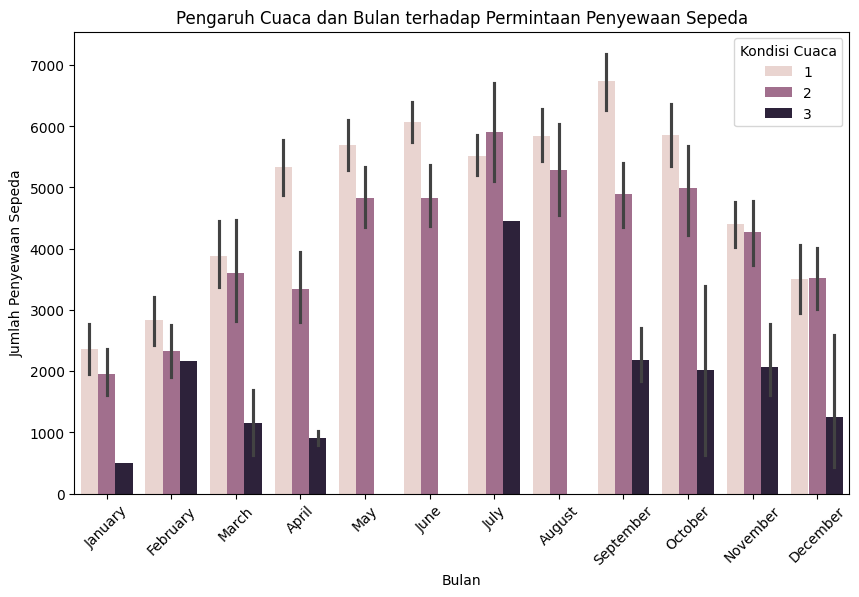

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='cnt', hue='weathersit', data=day_data)
plt.title('Pengaruh Cuaca dan Bulan terhadap Permintaan Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Kondisi Cuaca', loc='upper right')
plt.show()


### Pertanyaan 2:

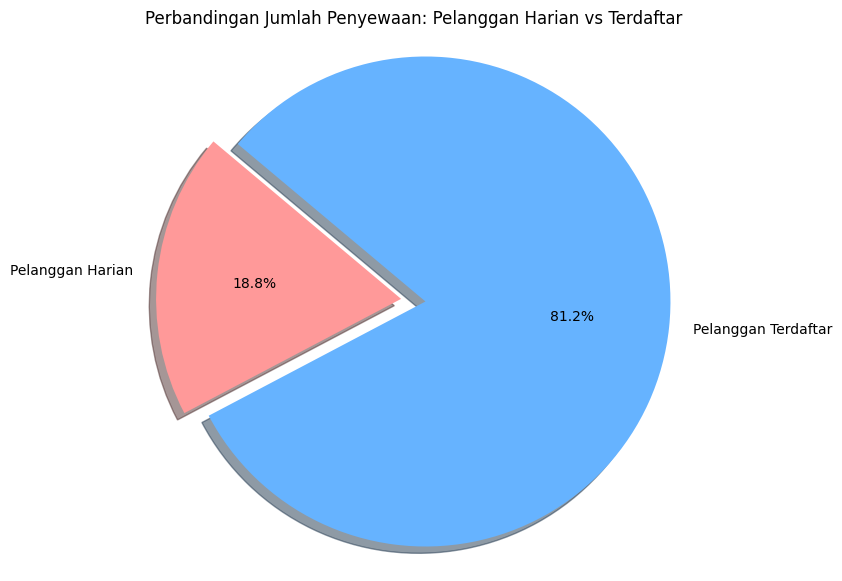

In [6]:
labels = ['Pelanggan Harian', 'Pelanggan Terdaftar']
sizes = [day_data['casual'].sum(), day_data['registered'].sum()]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Membuat potongan pada pie chart

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Perbandingan Jumlah Penyewaan: Pelanggan Harian vs Terdaftar')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

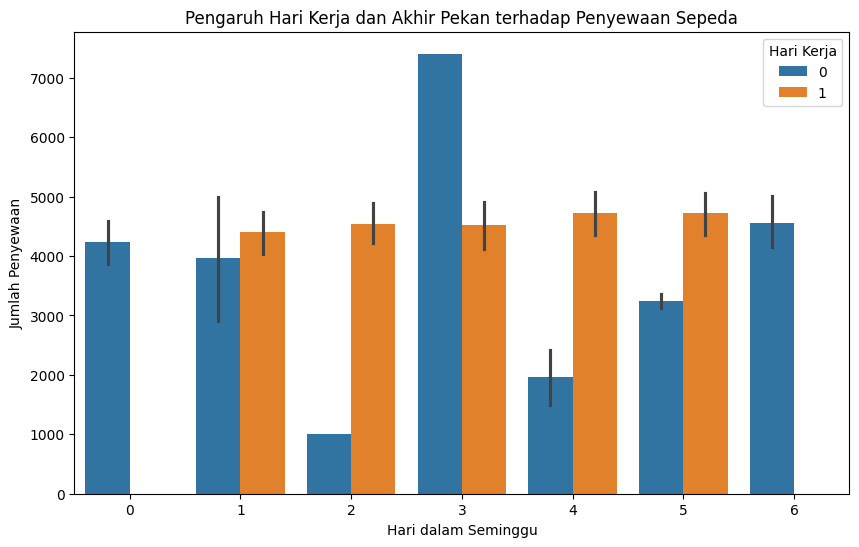

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', hue='workingday', data=day_data)
plt.title('Pengaruh Hari Kerja dan Akhir Pekan terhadap Penyewaan Sepeda')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Hari Kerja', loc='upper right')
plt.show()

day_data.to_csv('D:/Penyimpanan Uama/BANGKIT 2024/Submision Dicoding Analisis data/Bike-sharing-dataset/bike_sharing_cleaned.csv', index=False)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2